# Test harness for applied vibration class

### Import the libraries

In [1]:
import numpy as np
import math
import pandas as pd

### Import the signal processing library

In [2]:
from appvib import ClSigFeatures

#### Verify help and class structure

In [3]:
help(ClSigFeatures)

Help on class ClSigFeatures in module appvib:

class ClSigFeatures(ClassPlotSupport)
 |  ClSigFeatures(np_d_sig, d_fs, str_point_name='CH1', str_machine_name='Machine', dt_timestamp=datetime.datetime(1990, 1, 1, 0, 0, tzinfo=datetime.timezone.utc))
 |  
 |  Class to manage signal features on scope data and other signals
 |  
 |  Example usage:
 |      cl_test = ClSigFeatures(np.array([1.,2., 3.]),1.1)
 |  
 |  Should produce:
 |  
 |      print('np_d_sig: '+ np.array2string(cl_test.np_d_sig))
 |      print('timebase_scale: ' + '%0.3f' % cl_test.timebase_scale)
 |      print('i_ns: ' + '%3.f' % cl_test.i_ns)
 |      print('d_t_del: ' + '%0.3f' % cl_test.d_t_del)
 |      print('d_time' + np.array2string(cl_test.d_time))
 |  
 |      np_d_sig: [1. 2. 3.]
 |      i_ns:   3
 |  
 |      Attributes
 |      ----------
 |  
 |      Methods
 |      -------
 |  
 |  Method resolution order:
 |      ClSigFeatures
 |      ClassPlotSupport
 |      builtins.object
 |  
 |  Methods defined here:
 |  

### Define plot mode. 
Interactive mode is helpful for visuallizing the program execution

In [4]:
#%matplotlib widget

### Test for minimal construction

In [5]:
ClSigTestMin = ClSigFeatures(np.array([1.,2., 3.]),1.1)

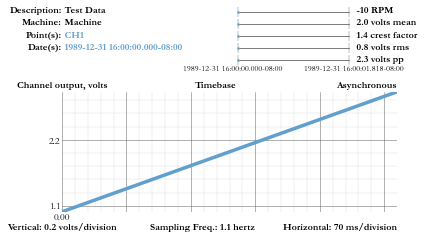

In [6]:
lst_testmin = ClSigTestMin.plt_sigs()

### Test - Even number of samples

In this test a simple sin wave is created and passed into the signal feature object for processing

In [7]:
d_fs_even = 2048
i_ns = (d_fs_even*2)
d_freq_sig = 20./(float(i_ns)/d_fs_even)
print('Signal frequency, hertz: ' + '%0.10f' % d_freq_sig)
d_timebase_scale = float(i_ns)/(d_fs_even*12.)
d_time_ext = np.linspace(0,(i_ns-1),i_ns)/float(d_fs_even)
np_d_test_even = np.sin(2 * math.pi * d_freq_sig * d_time_ext )
ClSigEven = ClSigFeatures(np_d_test_even, d_fs_even)

Signal frequency, hertz: 10.0000000000


#### Test plot

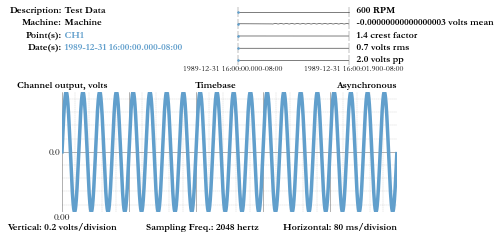

In [8]:
lst_sig_even = ClSigEven.plt_sigs()

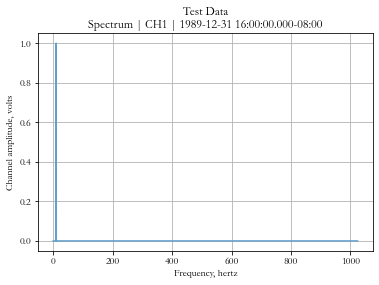

In [9]:
lst_spec_even = ClSigEven.plt_spec()

Extract the maximum value (assumed to be our component at 10 hertz) and check that the amplitude is very close to 1.

In [10]:
d_test_point = np.max(np.abs(lst_spec_even[2]))
print('Maximum spectral value: ' + '%0.10f' % d_test_point)
assert abs(d_test_point - 1.) < 1e-3, 'Failed to find even component amplitude'

Maximum spectral value: 0.9995119571


### Test - Odd number of samples

In this test a simple sin wave with an odd number of samples is created and passed into the signal feature object for processing. This is primarily to test the rfft scaling.

In [11]:
d_fs = 2047
i_ns = (d_fs*3)
d_freq_sig = 30./(float(i_ns)/d_fs)
print('Signal frequency, hertz: ' + '%0.6f' % d_freq_sig)
d_time_ext = np.linspace(0,(i_ns-1),i_ns)/float(d_fs)
np_d_test = np.sin(2 * math.pi * d_freq_sig * d_time_ext )
ClSigOdd = ClSigFeatures(np_d_test, d_fs)

Signal frequency, hertz: 10.000000


#### Test plot

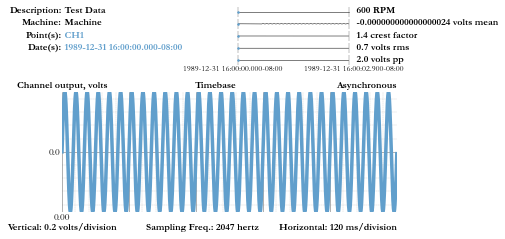

In [12]:
lst_plot_odd = ClSigOdd.plt_sigs()

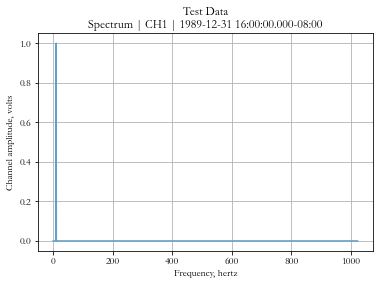

In [13]:
lst_spec_odd = ClSigOdd.plt_spec()

In [14]:
d_test_point = np.max(np.abs(lst_spec_odd[2]))
print('Maximum spectral value: ' + '%0.6f' % d_test_point)
assert abs(d_test_point - 1.) < 1e-3, 'Failed to find odd component amplitude'

Maximum spectral value: 0.999837


### Test for engineering units

In [15]:
ClSigTestMin.str_eu = "g's"

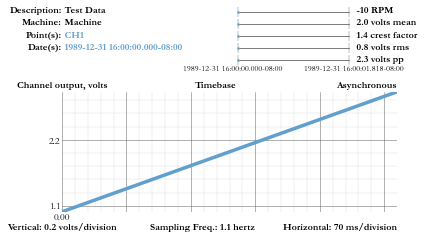

In [16]:
lst_sigs_eu = ClSigTestMin.plt_sigs()

In [17]:
lst_sigs_eu.set_size_inches(4*1.6, 4)
lst_sigs_eu.savefig('Test_Timebase_EU.pdf')

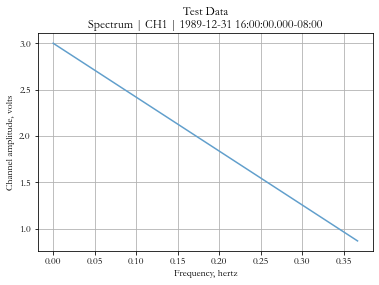

In [18]:
lst_spec_eu = ClSigTestMin.plt_spec()

### Test plot annotations

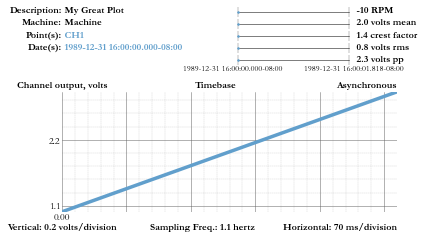

In [19]:
ClSigTestMin.str_plot_desc = 'My Great Plot'
lst_sigs_title = ClSigTestMin.plt_sigs()

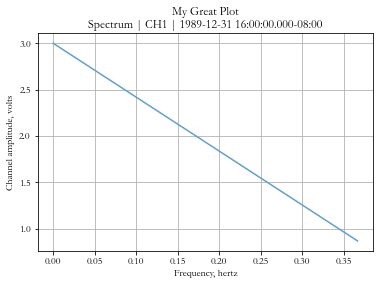

In [20]:
lst_spec_title = ClSigTestMin.plt_spec()

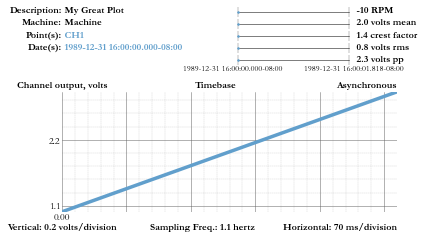

In [21]:
ClSigTestMin.ylim_tb = [-2., 2.]
lst_sigs_ylim_tb = ClSigTestMin.plt_sigs()

#### Labelling for the minimum instatiation case

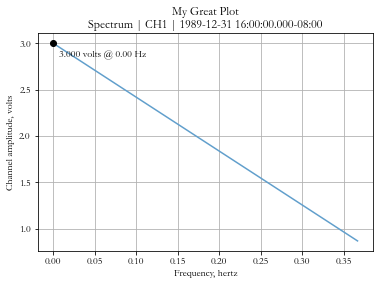

In [22]:
ClSigTestMin.b_spec_peak = True
lst_spec_peak_tb = ClSigTestMin.plt_spec()

#### Labelling for the even number of sample cases

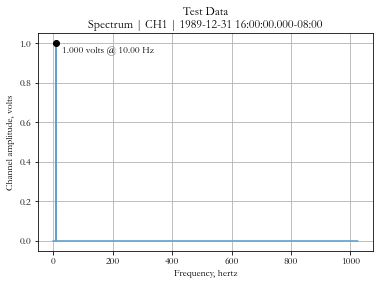

In [23]:
ClSigEven.b_spec_peak = True
lst_spec_peak_tb = ClSigEven.plt_spec()

#### Labelling for the odd number of sample cases

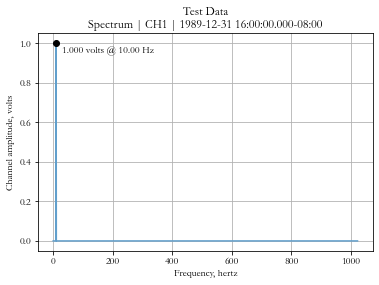

In [24]:
ClSigOdd.b_spec_peak = True
lst_spec_peak_tb = ClSigOdd.plt_spec()

Check the help to be sure it is relevant

In [25]:
help(ClSigFeatures.plt_spec)

Help on function plt_spec in module appvib:

plt_spec(self)
    Plot data in frequency domain. This method assumes a real signal
    
    Return values:
    list : [handle to the plot, frequency labels, complex-spectral values]



Check the estimated frequency

In [26]:
idx_max = np.argmax(np.abs(lst_spec_peak_tb[2]))
d_freq = lst_spec_peak_tb[1]
d_freq_est = d_freq[idx_max]
assert abs( d_freq_est - 10.0) < 1e-12, 'Failed to find odd number frequency'
print('Estimate frequency: ' + '%0.12f' % d_freq_est)

Estimate frequency: 10.000000000000


### Test for minimal construction, multiple channels

#### First channel (index = 0)

In [27]:
d_fs_ch1 = 1.1
cl_sig_mult_ch = ClSigFeatures(np.array([1.,2., 3.]),d_fs_ch1)

#### Second channel (index = 1)

In [28]:
d_fs_ch2 = 2.2
np_ch2 = np.array([3., 2.5, 2.])
cl_sig_mult_ch.idx_add_sig(np_ch2, d_fs_ch2, str_point_name='CH2') 

1

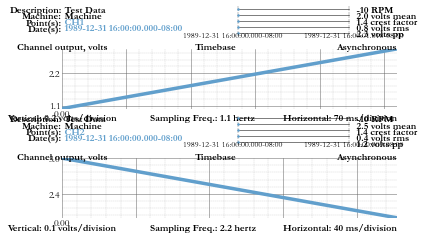

In [29]:
lst_testmin = cl_sig_mult_ch.plt_sigs()

In [30]:
cl_sig_mult_ch.b_save_data()

True

Read the file back in and compare to the input data

In [31]:
lst_file = cl_sig_mult_ch.b_read_data_as_df(str_filename=cl_sig_mult_ch.str_file)

Extract the data frame

In [32]:
df_test = lst_file[0]
d_fs_test = lst_file[1]
d_delta_t_test = lst_file[2]

In [33]:
assert abs(df_test.CH2[2] - np_ch2[2]) < 1e-15, 'Failed to save second data series' 
assert abs(df_test.CH2[1] - np_ch2[1]) < 1e-15, 'Failed to save second data series' 

### Event times

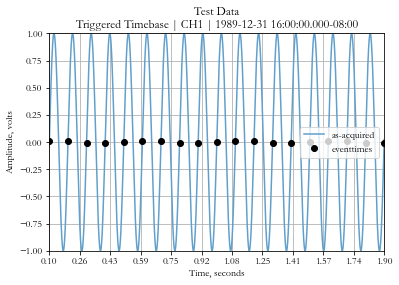

In [34]:
d_threshold = 0.0
d_hysteresis = 0.1
d_eventtimes = ClSigEven.np_d_est_triggers(np_d_sig=ClSigEven.np_d_sig, i_direction=0, d_threshold=d_threshold, 
                            d_hysteresis=d_hysteresis, b_verbose=False)
lst_eventtimes = ClSigEven.plt_eventtimes()

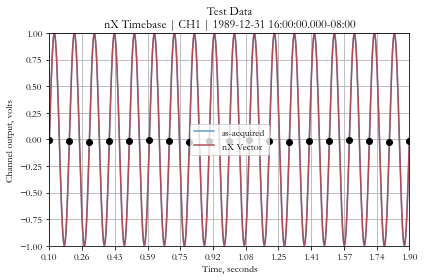

In [35]:
lst_nx = ClSigEven.plt_nx()

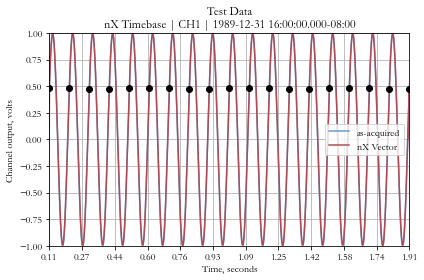

In [36]:
d_threshold = 0.5
d_hysteresis = 0.1
d_eventtimes = ClSigEven.np_d_est_triggers(np_d_sig=ClSigEven.np_d_sig, i_direction=0, d_threshold=d_threshold, 
                            d_hysteresis=d_hysteresis, b_verbose=False)
lst_nx = ClSigEven.plt_nx()